
---

# Titanic data analysis & prediction project

<br>

#### **오진규,   데이터 분야 신입 포지션 지원자**

---
- **Alternative connection links**

  - [Github](https://github.com/ojg1993/Portfolio.git)

  - [Colab](https://colab.research.google.com/drive/11OA38pkdv5kxBJHMPsxUP3YcvremRVGX?usp=sharing)

---

## Table of contents
- 1. [Introduction](#1.-Introduction)
- 2. [Data loading & checking](#2.-Data-loading-&-checking)
    - 2.1 [Library setting & Data loading](#2.1-Library-setting-&-Data-loading)
    - 2.2 [Data checking](#2.2-Data-checking)
    - 2.3 [Outlier detection](#2.3-Outlier-detection)
- 3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    - 3.1 [Numerical features](#3.1-Numerical-features)
        - 3.1.1 [SibSp(Siblings/Spouse)](#3.1.1-SibSp(Siblings/Spouse))
        - 3.1.2 [Parch(Parents/Children)](#3.1.2-Parch(Parents/Children))
        - 3.1.3 [Age](#3.1.3-Age)
        - 3.1.4 [Fare](#3.1.4-Fare)
    - 3.2 [Categorical features](#3.2-Categorical-features)
        - 3.2.1 [Sex](#3.2.1-Sex)
        - 3.2.2 [Pclass](#3.2.2-Pclass)
        - 3.2.3 [Embarked](#3.2.3-Embarked)
- 4. [Filling missing values](#4.-Filling-missing-values)
    - 4.1 [Age](#4.1-Age)
    - 4.2 [Cabin](#4.2-Cabin)
    - 4.3 [Embarked](#4.3-Embarked)

- 5. [Feature engineering](#5.-Feature-engineering)
    - 5.1 [Name & Prefix](#5.1-Name-&-Prefix)
    - 5.2 [Family size](#5.2-Family-size)
    - 5.3 [Age](#5.3-Age)
    - 5.4 [Ticket](#5.4-Ticket)
    - 5.5 [One-Hot encoding & Normalisation](#5.5-One-Hot-encoding-&-Normalisation)

- 6. [Predictive modeling](#6.-Predictive-modeling)
    - 6.1 [Finding suitable models](#6.1-Finding-suitable-models)
    - 6.2 [Hyper-Parameter tuning](#6.2-Hyper\-Parameter-tuning)
        - 6.2.1 [SVC_linear](#6.2.1-SVC_linear)
        - 6.2.2 [SVC_rbf](#6.2.2-SVC_rbf)
        - 6.2.3 [Random Forest](#6.2.3-Random-Forest)
        - 6.2.4 [Neural Netwrok(MLP)](#6.2.4-Neural-Network(MLP))
        - 6.2.5 [Logistic Regression](#6.2.5-Logistic-Regression)
        - 6.2.6 [Gradient Boosting](#6.2.6-Gradient-Boosting)
    - 6.3 [Learning Curve](#6.3-Learning-Curve)
    - 6.4 [Linear Correlation](#6.5-Linear-Correlation)
- 7. [Prediction](#7.-Prediction)
    - 7.1 [Ensemble modeling](#7.1-Ensemble-modeling)
    - 7.2 [Final prediction](#7.2-Final-prediction)
- 8. [General Review](#8.-General-Review)



# 1. Introduction

> *타이타닉호 침몰사건: 1912년 4월 15일 항해 중 빙산과의 충돌로 2224명의 탑승자 중 1502명 사망*

**타이타닉호는 세계에서 가장 유명한 여객선이자 침몰선이다.**

그 크기가 당시 세계 최대의 규모로 불침선(The Unsinkable)이라는 별칭도 있었으나, 첫 항해에 빙산과 충돌하여 침몰한 사건으로 가장 유명한 비극 중 하나로 회자된다.

침몰한지 100년이 넘었고 참사의 사망자 수가 1위가 아님에도 불구하고, 다수의 귀족 및 명사들이 탑승하여 희생되었으며 상세한 기록이 남아있는 등 여러 특이점으로 인해 현대 사회에서도 영화 및 뮤지컬로 이야기를 재구성하여 잊혀지지 않는 사건으로 널리 알려지고 있다.
<br><br>
**이번 프로젝트의 목적은 타이타닉의 상세한 기록을 분석하여 생존 여부에 기여한 특징들을 찾아내고 그 특징들을 통하여 생존/희생자를 분류하는 예측 모델을 구축하는 것이다.**



# 2. Data loading & checking

## 2.1 Library setting & Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Ignore warnings
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

In [2]:
# Assign data to variables
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 2.2 Data checking

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


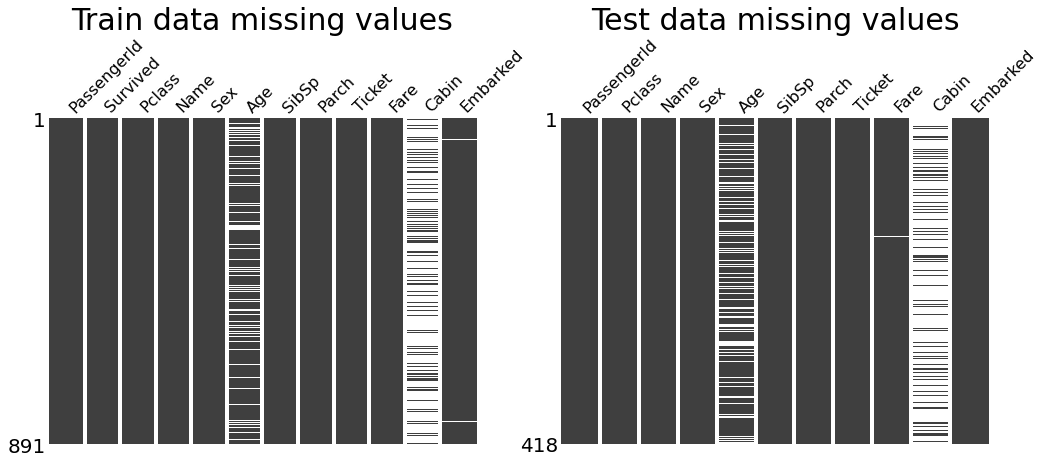

In [9]:
# Create a 1x2 subplot with a specified figure size
f, ax = plt.subplots(1, 2, figsize=(15, 6))

# Draw a missing value matrix of the train data
msno.matrix(df=train, ax=ax[0])
ax[0].set_title('Train data missing values', size=30)

# Draw a missing value matrix of the test data
msno.matrix(df=test, ax=ax[1])
ax[1].set_title('Test data missing values', size=30)

# Display the subplot
plt.show()

- Train
  - Data shape    : 891 x 12
  - Data type     : Int, Str 및 Float
  - Missing values: Age, Cabin 및 Embarked feature
<br><br>
- Test
  - Data shape    : 418 x 11
  - Data type     : Int, Str 및 Float
  - Missing values: Age, Fare 및 Cabin feature
<br><br>
- Target feature: Survived

## 2.3 Outlier detection

In [10]:
from collections import Counter

def outlier_detector(df, n, features):
    '''
    This function takes a DataFrame, a threshold (n), and a list of features as input.
    It uses the Tukey method to identify outliers in the passed features and returns a list of indices of rows 
    that contain more than (n-1) outliers.
    '''
    # Define outlier index list
    outlier_indices = list()
    
    # loop over passed featrues and define Q1, Q3, IQR and outlier_range then detect rows that contain more than (n-1) outliers
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        # numpy's percentile method has it default to ignore missing values
        IQR = Q3 -Q1
        outlier_range = 1.5 * IQR

        low = Q1 - outlier_range
        high = Q3 + outlier_range

        outlier_list_col = df[(df[col] < low) | (df[col] > high)].index
        outlier_indices.extend(outlier_list_col)
    # count the outliers of the features in the rows, then if each row has more than (n-1) outliers append it in the outliers hen return
    outlier_indices = Counter(outlier_indices)
    outliers = list(k for k,v in outlier_indices.items() if v >= n)
    return outliers

# function calling
outliers = outlier_detector(train, 3, ['Age', 'SibSp', 'Parch', 'Fare'])

In [11]:
print(train.loc[outliers].shape)
train.loc[outliers]

(10, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


- 이상치 데이터는 예측 과정에서 큰 영향을 미칠 수 있으므로 데이터의 수가 줄어들 수 있는 단점에도 불구하고 제거하기로 결정하였다.
  - outlier_detector 함수는 데이터의 Q3에서 Q1를 뺀 IQR(사분위수)을 정의하고 1.5배수 +- 범위에서 벗어나는 데이터들을 찾아내는 Tukey method를 구현하였다.
  - 숫자형 자료인 Age, SibSp, Parch 및 Fare feature 중 이상치를 찾고자 하였으며, 3개 이상의 이상치를 가지고 있는 row는 10개이다.  

- 참고자료
  - https://whitewing4139.tistory.com/178
  - https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600

In [12]:
# Remove the outlier rows from the train data
train = train.drop(outliers, axis=0).reset_index(drop=True)

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [14]:
train.info()
print()
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# 3. Exploratory Data Analysis

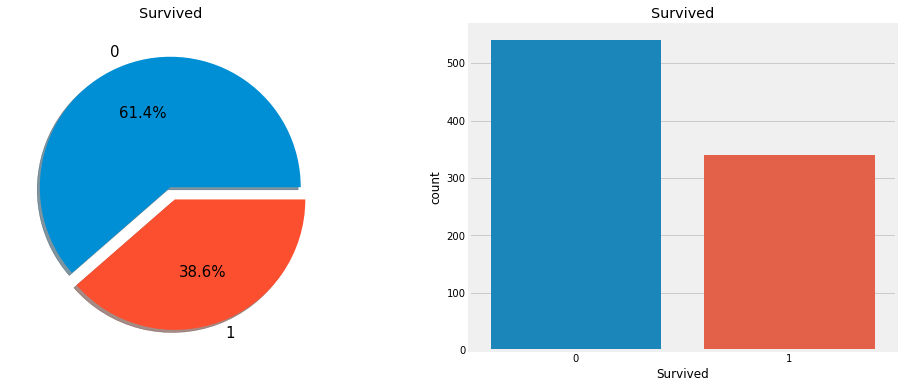

In [16]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1,2, figsize=(15, 6))

# Draw a pie chart of the survival rate
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True, fontsize=15)
ax[0].set_title('Survived') # Set the title as Survived
ax[0].set_ylabel('') # Remove the y-axis label

# Draw a countplot of the survival rate
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived') # Set the title as Survived

# Display the subplot
plt.show()

- Train data 기준 생존율은 약 38%이다.

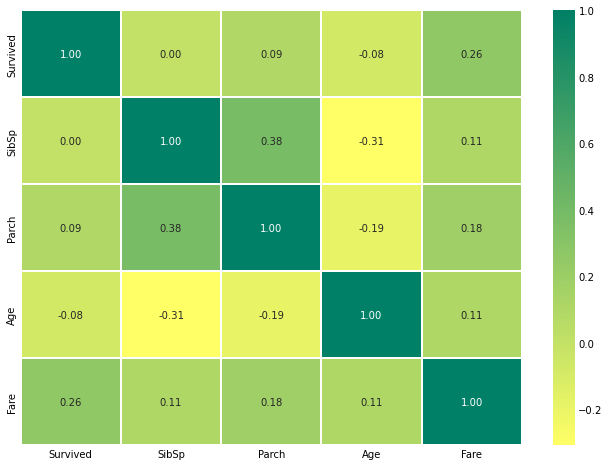

In [17]:
# Draw a heatmap of the correlation between various features and survival
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(),
            annot=True, fmt='.2f', cmap='summer_r', linewidths=0.2)
# Adjust size of the palette
fig=plt.gcf()
fig.set_size_inches(10,8)
# Display the heatmap
plt.show()

- 피어슨 선형 상관계수에 의하면, 데이터 가공 전 Target feature와 유의미한 상관관계를 가지고 있는 feature는 Fare뿐인 것으로 보이나, **feature별 subpopulation과의 관계까지 알 수 있는 것은 아니므로** 더 자세한 분석을 해볼 필요가 있다.

## 3.1 Numerical feature

### 3.1.1 SibSp(Siblings/Spouse)

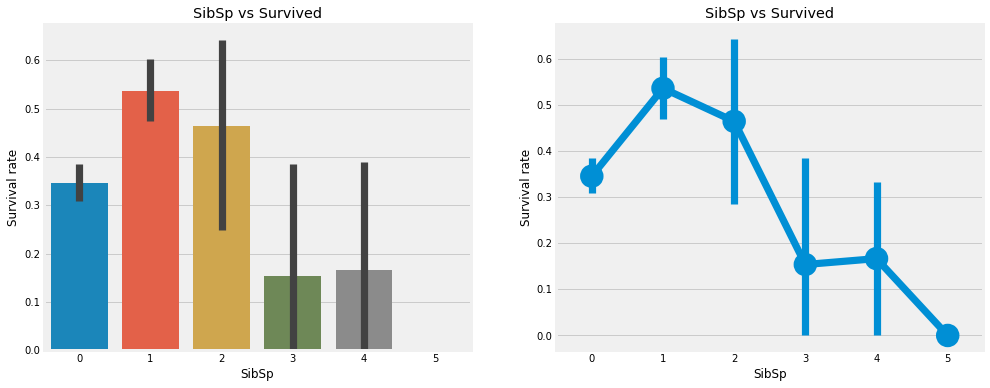

In [18]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1, 2, figsize=(15, 6))

# Draw a bar plot of the relationship between SibSp and Survived
sns.barplot('SibSp', 'Survived', data=train, ax=ax[0])
ax[0].set_title('SibSp vs Survived') # Set the title 
ax[0].set_ylabel('Survival rate') # Set the y-axis label

# Draw a point plot of the relationship between SibSp and Survived
sns.pointplot('SibSp', 'Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Survival rate') # Set the y-axis label
ax[1].set_title('SibSp vs Survived') # Set the title 

# Display the subplot
plt.show()

In [19]:
# Create a cross-tabulation table of SibSp and Pclass and style it with a winter_r color map
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap='winter_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,0,1,12
4,0,0,18
5,0,0,5


- SibSp의 범위가 0~2인 경우 그렇지 않은 경우와 비교적 높은 생존율을 가지고 있다.
- SibSp가 2를 넘어갈 경우 Pclass의 등급이 현저하게 낮아지는 것을 확인할 수 있다.

### 3.1.2 Parch(Parents/Children)

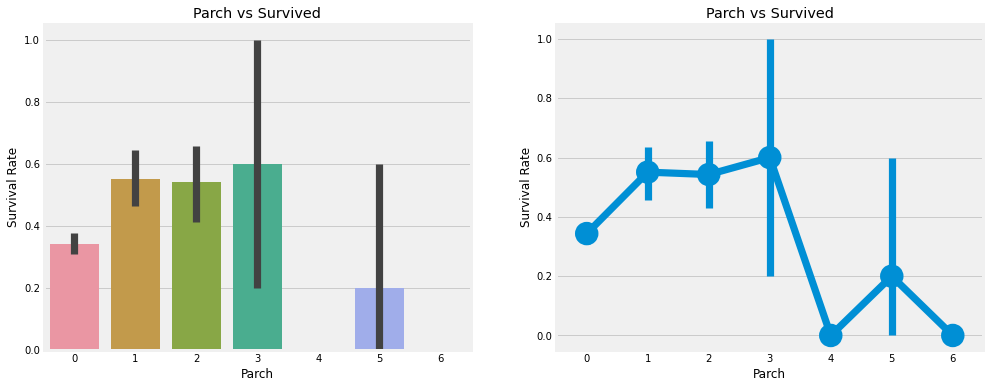

In [20]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1, 2, figsize=(15, 6))

# Draw a bar plot of the relationship between Parch and Survived
sns.barplot('Parch', 'Survived', data=train, ax = ax[0])
ax[0].set_title('Parch vs Survived')
ax[0].set_ylabel('Survival Rate')

# Draw a point plot of the relationship between Parch and Survived
sns.pointplot('Parch', 'Survived', data=train, ax=ax[1])

ax[1].set_ylabel('Survival Rate')
ax[1].set_title('Parch vs Survived')

# Display the subplot
plt.show()

In [21]:
# Create a cross-tabulation table of SibSp and Pclass and style it with a winter_r color map
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap='winter_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,0,1,12
4,0,0,18
5,0,0,5


- Parch의 범위가 0~3 일 때 평균적인 생존율이 약 50%인 반면 3보다 클 경우 아주 낮음을 확인할 수 있다.
- Parch가 2를 넘어갈 경우 Pclass의 등급이 현저하게 낮아지는 것을 관찰할 수 있다.
<br><br>

- Parch는 SibSp와 마찬가지로 가족의 수를 나타내고, 각 결과를 고려했을 때 다음과 같은 일반적인 추측을 할 수 있다.
  - 큰 가족 단위로 탑승했을 경우 사고 당시 가족들을 찾기 위해 배회 또는 구출 중 적기에 탈출하지 못했다.
  - Pclass가 낮아질수록 생존율이 낮다.

### 3.1.3 Age

In [22]:
# Print the youngest passenger's age, oldest passenger's age and mean age of all passengers
print(f'Youngest Passenger: {np.round(train["Age"].min(), 1)} years old')
print(f'Oldest Passenger: {train["Age"].max()} years old')
print(f'Average Age of Passengers: {np.round(train["Age"].mean(), 1)} years old')

Youngest Passenger: 0.4 years old
Oldest Passenger: 80.0 years old
Average Age of Passengers: 29.7 years old


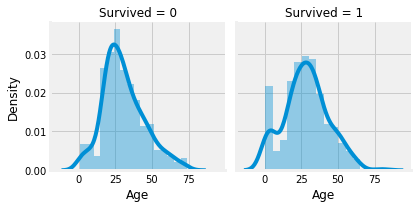

In [23]:
# Create a FacetGrid for visualizing the distribution of Age by Survival
g = sns.FacetGrid(train, col='Survived')

# Draw a histogram of Age for each value of Survived
g.map(sns.distplot, 'Age')

# Display the plot
plt.show()

- 나이가 가장 많은 승객은 80세이며 가장 어린 승객은 4개월 그리고 승객의 평균 나이는 29.7세이다.
- 또한, 사망자와 생존자의 분포도가 다른 것을 확인할 수 있다.

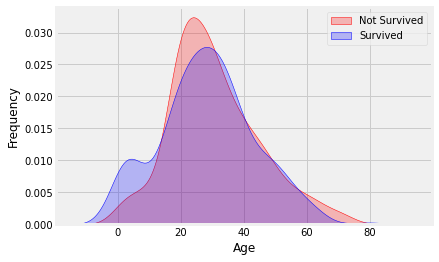

In [24]:
# Create a kde plot of the age of passengers who did not survive, with red shading
sns.kdeplot(train['Age'][(train['Survived'] == 0) & (train.Age.notnull())], color='r', shade=True, label='Not Survived')

# Create a kde plot of the age of passengers who did survive, with blue shading
sns.kdeplot(train['Age'][(train['Survived'] == 1) & (train.Age.notnull())], color='b', shade=True, label='Survived')

# Set the x-axis label to "Age"
plt.xlabel('Age')
# Set the y-axis label to "Frequency"
plt.ylabel('Frequency')
# Add a legend to the plot in the "best" location
plt.legend(loc='best')

# Display the plot
plt.show()

- Overlap하여 그래프를 비교했을 때, 약 0~15세 나이 범위에서 생존율이 확연히 높은 것을 확인할 수 있다.

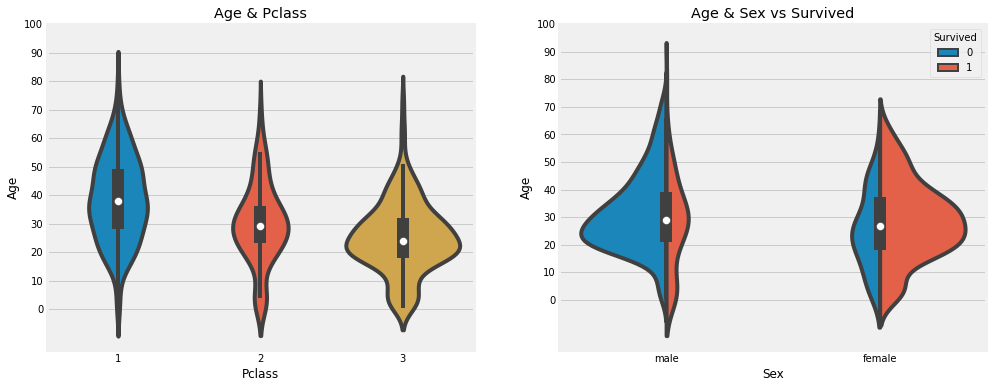

In [25]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1,2, figsize=(15,6))

# Create a violin plot of the relationship between Age and Pclass, with the width of the violin plot representing the number of observations in each category
sns.violinplot('Pclass', 'Age', data=train, scale='count', ax=ax[0])
# Set the title of the first plot to "Age & Pclass"
ax[0].set_title('Age & Pclass')
# Set the y-axis ticks to range from 0 to 110 in steps of 10
ax[0].set_yticks(range(0,110,10))

# Create a violin plot of the relationship between Age, Sex and Survived, with the width of the violin plot representing the number of observations in each category
sns.violinplot('Sex','Age', hue='Survived', data=train, scale='count', split=True,ax=ax[1])
# Set the title of the second plot to "Age & Sex vs Survived"
ax[1].set_title('Age & Sex vs Survived')
# Set the y-axis ticks to range from 0 to 110 in steps of 10
ax[1].set_yticks(range(0,110,10))

# Display the figure
plt.show()

- Pclass와 Sex Feature를 함께 분석 시 다음과 같은 정보를 확인할 수 있다.
  - 나이가 많을수록 높은 등급의 Pclass를 가지고 있다.
  - 남성의 경우 나이와 관계없이 대체적으로 생존확률이 매우 낮으나 약 7세 이하에서 급격히 높은 생존율을 가진다.
  - 여성의 경우 나이와 관계없이 대체적으로 생존 확률이 매우 높다.

### 3.1.4 Fare

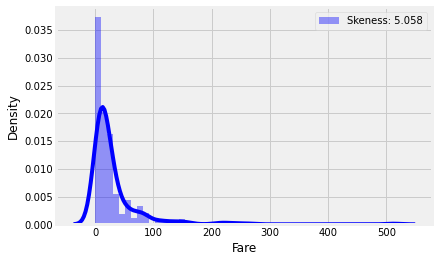

In [26]:
# Create a histogram and a kernel density estimate (KDE) plot of the Fare column of the train dataset
sns.distplot(train['Fare'], color='b', label=f'Skeness: {train.Fare.skew().round(3)}')

# Add a legend to the plot showing the skewness of the Fare column
plt.legend()

# Display the plot
plt.show()

- Fare feature의 외도가 좌측으로 편향되어 있어 정규분포와는 큰 차이가 나는 것을 알 수 있다.
- 편향된 외도는 예측 시 신뢰도를 낮추는 특성을 가지고 있으므로, log 함수를 적용하여 외도를 조정하는 작업을 실시할 것이다.

In [27]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
test['Fare'].fillna(train.loc[train['Pclass'] == 3, 'Fare'].median(), inplace=True)
# To prevent the missing value from test data set being imputed to 0 due to the code below, I have chosen to replace it with the median value of Pclass 3

In [31]:
# Apply log transformation on Fare column of the train and test dataset
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

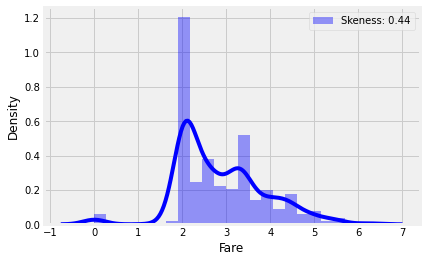

In [32]:
# Create a histogram and a kernel density estimate (KDE) plot of the Fare column of the train dataset
sns.distplot(train['Fare'], color='b', label=f'Skeness: {train.Fare.skew().round(3)}')

# Add a legend to the plot showing the skewness of the Fare column
plt.legend()

# Display the plot
plt.show()

-  log 함수 적용 후 skewness가 5에서 0.44로 감소하였으며 조금 더 정규분포와 유사한 형태를 가진 것을 확인할 수 있다.

In [33]:
train.Fare.describe()

count    881.000000
mean       2.874014
std        0.988903
min        0.000000
25%        2.066331
50%        2.670985
75%        3.417727
max        6.238967
Name: Fare, dtype: float64

In [34]:
# Create a new column 'Fare_band' in the train dataset by dividing the Fare column into 4 equal-size groups
train['Fare_band'] = pd.qcut(train['Fare'],4)

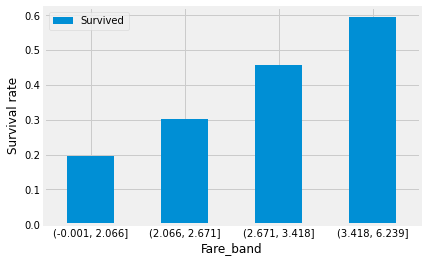

In [35]:
# Group the train dataset by the 'Fare_band' column and calculate the mean survival rate for each group
# Create a bar plot of the resulting mean survival rates
train[['Fare_band','Survived']].groupby('Fare_band').mean().plot.bar(rot=0)

# Add a y-axis label
plt.ylabel('Survival rate')

# Display the plot
plt.show()


- Fare feature를 4분할하여 그래프를 그려 보았을 때, 운임이 높은 범위에 속할수록 생존확률도 함께 증가한다.

## 3.2 Categorical features

### 3.2.1 Sex

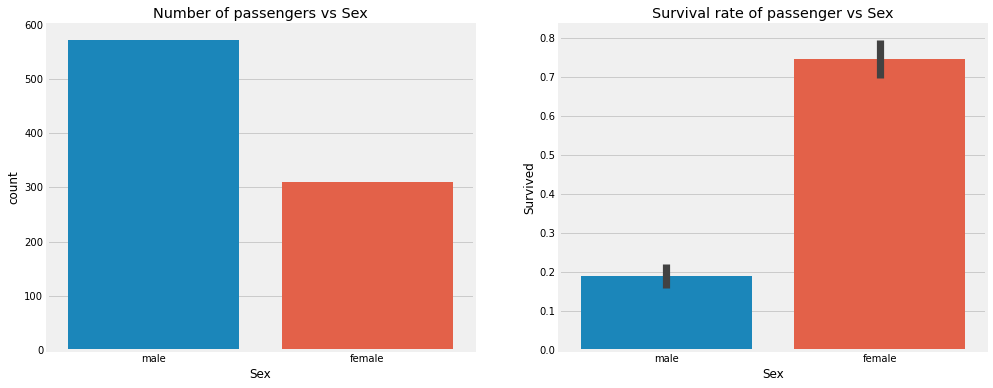

In [36]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1,2, figsize=(15,6))

# Create a count plot of the number of passengers for each value of the Sex column of the train dataset
sns.countplot('Sex', data=train, ax=ax[0])
# Set the title of the first plot to "Sum of passengers vs Sex"
ax[0].set_title('Number of passengers vs Sex')

# Create a bar plot of the mean survival rate for each value of the Sex column of the train dataset
sns.barplot('Sex', 'Survived', data=train, ax = ax[1])
# Set the title of the second plot to "Survival rate of passenger vs Sex"
ax[1].set_title('Survival rate of passenger vs Sex')

# Display the figure
plt.show()

- 남성의 승객의 수는 약 580명, 여성의 승객의 수는 약 300명으로 남성 탑승자 수가 2배가량 많으나, 생존율의 경우 여성 승객 약 80% 남성 탑승자 약 20%로 남성 승객보다 여성 승객의 생존율이 4배 이상임을 확인할 수 있다.

### 3.2.2 Pclass

In [37]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='winter_r')

Survived,0,1,All
Pclass,,,
1,79,134,213
2,97,87,184
3,365,119,484
All,541,340,881


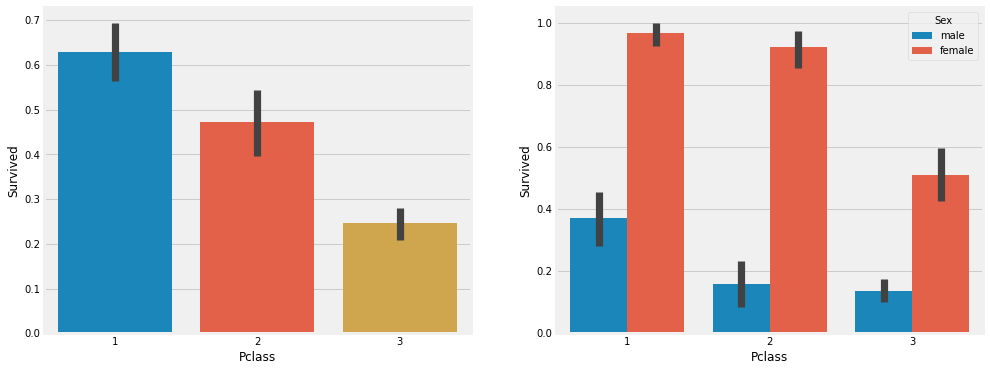

In [38]:
# Create a subplot with the given parameters
f, ax = plt.subplots(1,2, figsize=(15,6))

# Create a bar plot of Pclass vs Survived on the left subplot
sns.barplot('Pclass', 'Survived', data=train, ax=ax[0])

# Create a bar plot of Pclass vs Survived on the right subplot, grouped by Sex
sns.barplot('Pclass', 'Survived', data=train, hue='Sex', ax=ax[1])

# Display the plots
plt.show()

- 남성과 여성 모두 Pclass가 높을수록 생존 확률도 높아진다.
- 남성 승객의 경우 Pclaas 1에서 약 40%의 생존 확률을 가지나, 2와 3의 경우 약 18%로 낮은 확률의 생존율을 가진다.
- 여성 승객의 경우 Pclass 1과 2에서 대략 100%에 달하는 큰 생존 확률을 가지나, 3의 경우 50%에 그치는 것을 알 수 있다.


### 3.2.3 Embarked

In [39]:
# Get the count of unique values in the 'Embarked' column of the 'train' dataset
train.Embarked.value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

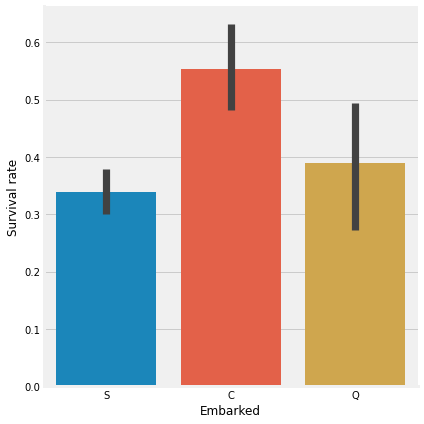

In [40]:
# Create a bar plot of the relationship between 'Embarked' and 'Survived' columns of the train dataset
g = sns.factorplot('Embarked', 'Survived', data=train, kind='bar', size=6)

# Set y-axis label
g.set_ylabels('Survival rate')

# Display the plot
plt.show()


- Port C에서 탑승한 승객의 생존율은 약 55%로 대략 33%의 S와 39%의 Q에 비교적으로 높은 생존 확률을 가졌다.
- 앞서 분석된 자료 결과에 따르면 Port C에서 여성, 어린이 또는 높은 Pclass를 보유한 승객이 주로 탔을 거라 추측해 볼 수 있다.

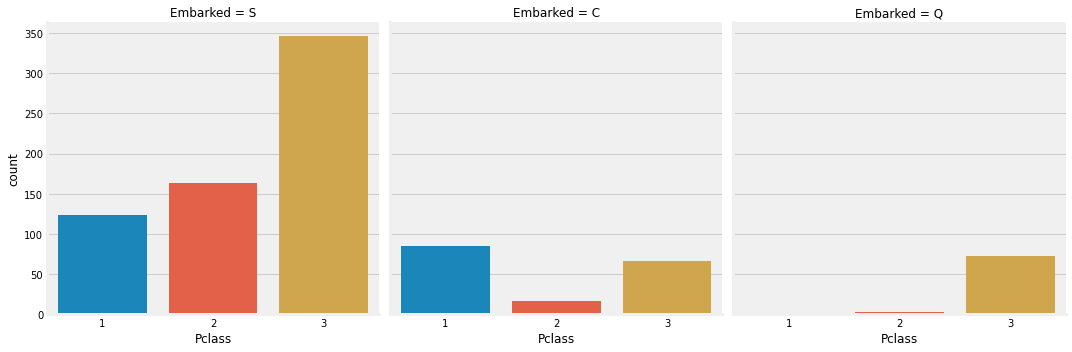

In [41]:
# Create a count plot of the relationship between 'Pclass' and 'Embarked' columns of the train dataset
sns.factorplot('Pclass', data=train, col='Embarked', kind='count')
# Display the plot
plt.show()

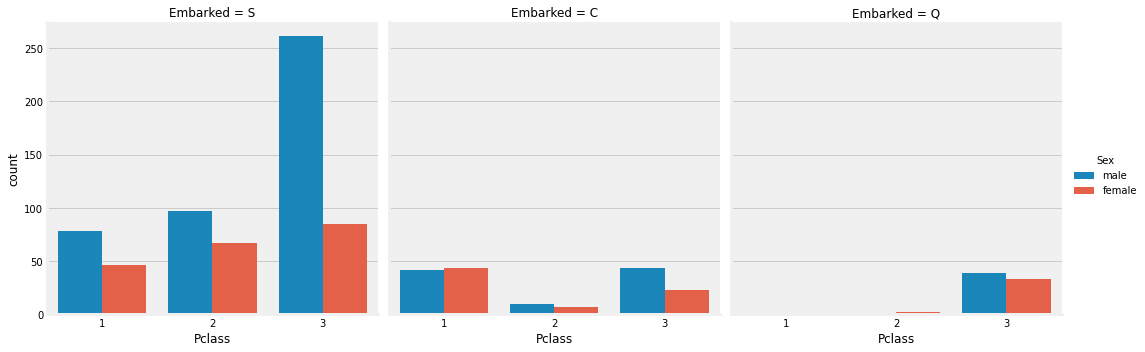

In [42]:
# Create a count plot of the relationship between 'Pclass', 'Embarked' and 'Sex' columns of the train dataset
sns.factorplot('Pclass', data=train, col='Embarked', hue='Sex', kind='count')
# Display the plot
plt.show()

- Port S는 Pclass 3을 소유한 승객이 압도적으로 많으며 대부분이 남성이다.
- Port C는 앞서 추측한 것과 같이 승객의 절반이 여성이며 많은 남성들도 Pclass 1,2의 높은 등급을 가지고 있었던 것을 확인할 수 있다.
- Port Q는 대략 절반의 승객이 여성임에도 불구하고 Pclass 3를 보유한 승객으로, 비슷한 특성의 Port C와 달리 생존율이 비교적 낮다.

# 4. Filling missing values

In [43]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
Fare_band        0
dtype: int64

In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## 4.1 Age
<br>

- Age의 결측치(train:170개, test:86개)를 대체하기 위해 다음과 같은 방법을 적용할 것이다.
  - Age의 str을 int로 변환
  - Age feature와 다른 numerical feature와의 피어슨 상관 계수를 파악하고 유의미한 관계를 같는 feature 선별
  - 결측치를 가지는 row와 타 row 중 선별된 features에서 동일한 값들을 같는 경우 그 row들의 중간값으로 결측치를 대체하고 그렇지 않은 경우 경우 전체의 중간값으로 대체
  - 동일한 값들이 있어 결측치를 대체한 경우 count하여 출력

In [45]:
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
876      male
877    female
878    female
879      male
880      male
Name: Sex, Length: 881, dtype: object

In [46]:
# Map the values of 'Sex' column of each dataset: 'male' to 0 and 'female' to 1
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [47]:
print(train.Sex.head())
print()
print(test.Sex.head())

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,S,"(-0.001, 2.066]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C,"(3.418, 6.239]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,"(2.066, 2.671]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S,"(3.418, 6.239]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,S,"(2.066, 2.671]"


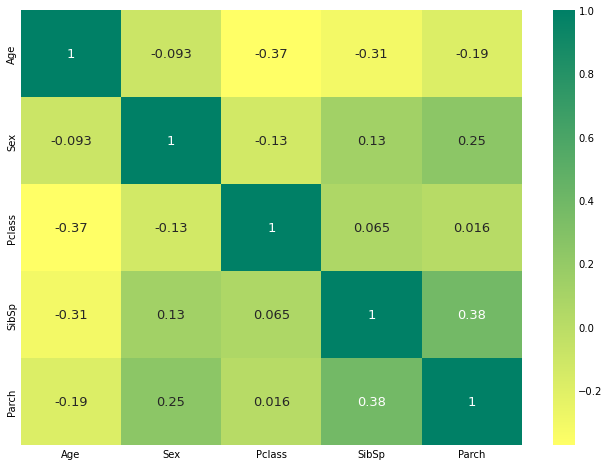

In [49]:
# Create a heatmap of the correlation between selected columns of the 'train' dataset
sns.heatmap(train[['Age','Sex','Pclass','SibSp','Parch']].corr(), cmap='summer_r', annot=True, annot_kws={'fontsize':13})

# Adjust size of the palette
fig=plt.gcf()
fig.set_size_inches(10,8)

# Show the plot
plt.show()

- Age feature와 밀접한 선형 관계를 가지고 있는 feature는 Pclass, SibSp 및 Parch로 나타나며 모두 음의 상관관계를 가지는 것을 확인할 수 있다.

In [50]:
def impute_age(df):
    '''
    This function imputes missing values in the 'Age' column of the input dataframe.
    It replaces missing values with the median age of rows with similar values for 'Pclass', 'SibSp', 'Parch' columns.
    If there is no similar rows, it replaces missing value with median of the entire 'Age' column
    '''
    med_cnt = 0
    pred_cnt = 0
    # Store the index of rows with missing values in the 'Age' column
    age_nan_idx = df.loc[df['Age'].isnull()].index
    # Calculate the median of the entire 'Age' column
    age_med = df['Age'].median()

    for idx in age_nan_idx:
        # Find the median of the 'Age' column for rows with similar values for 'Pclass', 'SibSp', 'Parch' columns
        age_pred = df['Age'][(df['Pclass'] == df.loc[idx, 'Pclass']) &
                                (df['SibSp'] == df.loc[idx, 'SibSp']) &
                                (df['Parch'] == df.loc[idx, 'Parch'])].median()
        if not np.isnan(age_pred):
            # If there is similar row, replace missing value with the median of 'Age' column for similar rows
            df.loc[idx, 'Age'] = age_pred
            pred_cnt += 1
        else:
            df.loc[idx, 'Age'] = age_med
            med_cnt += 1
    print('cnt of age_pred cases :', pred_cnt)
    print('cnt of age_med cases:', med_cnt)
    return df['Age']

In [51]:
# Use the 'impute_age' function to fill in missing values in 'Age' column of each dataframe
train['Age'] = impute_age(train)
test['Age'] = impute_age(test)

cnt of age_pred cases : 170
cnt of age_med cases: 0
cnt of age_pred cases : 84
cnt of age_med cases: 2


- Age의 결측치를 대체하는 함수를 정의하고 적용한 결과는 다음과 같다.
  - Train dataset 결측치: 170개의 모든 결측치를 닮은 row들을 찾아 그 중간값을 적용하였다..
  - Test dataset 결측치: 86개의 결측치 중 84개는 닮은 row들을 찾아 그 중간값을 적용하였고, 그렇지 않은 2개의 결측치는 Age 전체의 중간값으로 대체하였다.

In [52]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
Fare_band        0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## 4.2 Cabin

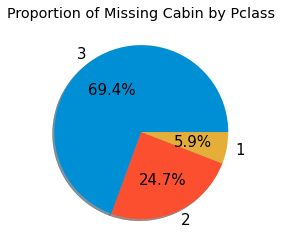

In [53]:
# Select all rows where 'Cabin' is null, and select the 'Pclass' column from those rows,
# then create a pie chart of the count, showing percentages on the chart and adding a shadow effect
train[train['Cabin'].isnull()]['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, fontsize=15)

# Add Title
plt.title("Proportion of Missing Cabin by Pclass")
# Remove the y-label
plt.ylabel('')

# Show the chart
plt.show()

In [54]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31',
       'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106',
       'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18',
       'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82',
       'B96 B98', 'E10', 'E44', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [55]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

- Cabin feature의 value는 문자와 숫자가 섞여있는 형태이다.
- train의 경우 881개 중 680개가 결측치, test의 경우 418개 중 327개가 결측치로 압도적으로 결측치의 비중이 높으며, 대다수가 Pclass3의 승객임을 알 수 있다.
- Cabin feature를 drop 하는 것도 고려해 볼 수 있으나, 실험적 측면에서 다음과 같은 가설을 세우고 생존율을 확인해 보는 절차를 진행할 필요가 있다.
---
- **가설: Cabin Feature가 결측치일 경우 cabin이 없는 입석 형태의 승객이다.**
---
- Cabin의 결측치를 B로 대체하고 B와 그 외 A의 합으로 생존율을 확인할 것이다.

In [56]:
# Loop through each value in the 'Cabin' column of each dataframe if the value is not null, assign 'A', if not 'B'
train['Cabin'] = pd.Series('A' if not pd.isnull(i) else 'B' for i in train['Cabin'])
test['Cabin'] = pd.Series('A' if not pd.isnull(i) else 'B' for i in test['Cabin'])

In [57]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Fare_band      0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


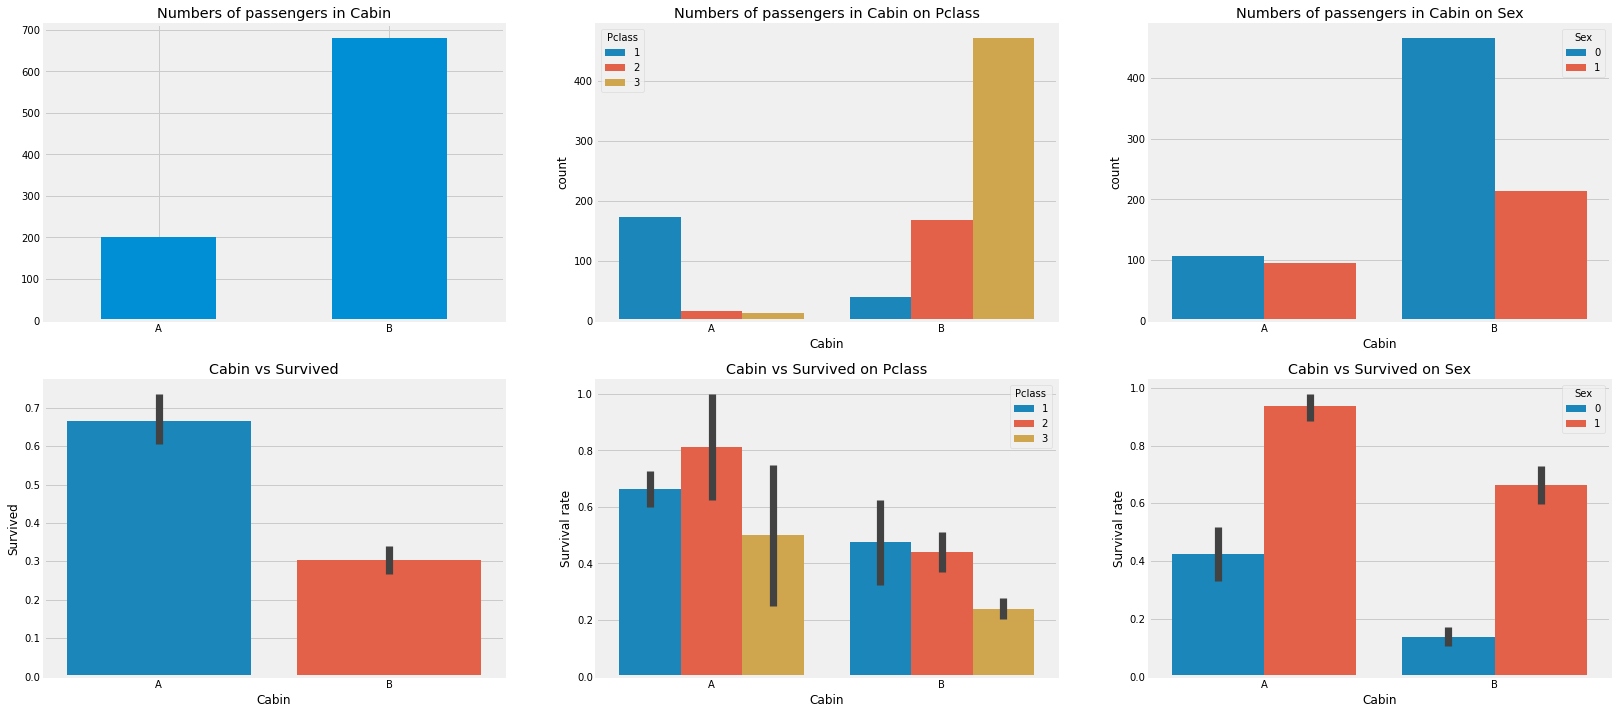

In [58]:
# Create a 2x3 subplot figure with given figsize
f, ax = plt.subplots(2,3, figsize=(25,12))

# Count the number of each 'Cabin' in train dataset and sor the index then plot a bar chart
train['Cabin'].value_counts().sort_index().plot.bar(rot=0, ax=ax[0,0])
# Add title
ax[0,0].set_title('Numbers of passengers in Cabin')
# Plot the count of 'Cabin' grouped by 'Pclass'
sns.countplot('Cabin', hue='Pclass', data=train.sort_values(by='Cabin'), ax=ax[0,1])
# Add title
ax[0,1].set_title('Numbers of passengers in Cabin on Pclass')
# Plot the count of 'Cabin' grouped by 'Sex'
sns.countplot('Cabin', hue='Sex', data=train.sort_values(by='Cabin'), ax=ax[0,2])
# Add title
ax[0,2].set_title('Numbers of passengers in Cabin on Sex')

# Plot the survival rate of 'Cabin'
sns.barplot('Cabin', 'Survived', data=train.sort_values(by='Cabin'), ax=ax[1,0])
# Add Title
ax[1,0].set_title('Cabin vs Survived')
# Plot the survival rate of 'Cabin' grouped by 'Pclass'
sns.barplot('Cabin', 'Survived', hue='Pclass', data=train.sort_values(by='Cabin'), ax=ax[1,1])
# Add Title
ax[1,1].set_title('Cabin vs Survived on Pclass')
# Add ylabel
ax[1,1].set_ylabel('Survival rate')
# Plot the survival rate of 'Cabin' grouped by 'Sex'
sns.barplot('Cabin', 'Survived', hue='Sex', data=train.sort_values(by='Cabin'), ax=ax[1,2])
# Add Title
ax[1,2].set_title('Cabin vs Survived on Sex')
# Add ylabel
ax[1,2].set_ylabel('Survival rate')

# Show the plot
plt.show()

- 시각화된 데이터를 분석했을 때 다음과 같은 인사이트를 얻을 수 있다.
  - Cabin B의 A에 비하여 승객이 압도적으로 많다.
  - Cabin A는 Pclass 1 -> 2 -> 3 순서로 많은 승객이 탑승하였으며 Pclass 1의 비율이 압도적이고, Cabin B의 경우 그 반대이다.
  - Cabin A의 성비는 큰 편차가 없지만 Cabin B의 경우 남성의 수가 2배 이상임을 알 수 있다.
  - Cabin A의 승객의 생존율이 B의 승객 생존율 보다 2배 이상을 상회한다.
  - Cabin A의 승객 중 Pclass 3를 가진 승객은 B의 Pclass 1과 거의 비슷한 생존율을 가지고 있다.
  - Cabin A의 남성 승객은 40% 상회하는 생존율을 보여줄 때 B의 남성 승객은 약 15%의 현저히 낮은 생존율을 보여주고 있다.
<br><br>
- **가설이 옳다는 가정하에서의 분석 결과는 매우 흥미로우며, 여러 가지 요인으로 인해 Cabin A의 승객이 높은 생존율을 가진다는 결론을 얻을 수 있다. 이로 연결하여 당시의 상황을 그려볼 때 Cabin을 소유한 승객은 개방되고 소음이 심한 선상보다 비상상황 알림을 듣는 것에 유리한 면이 있지 않았을까 추측해 볼 수 있다.** 

## 4.3 Embarked

In [59]:
# Find the rows that have missing values in Embarked featrue from train dataset
train.loc[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_band
60,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,4.382027,A,NaN,"(3.418, 6.239]"
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,4.382027,A,NaN,"(3.418, 6.239]"


- Embarked에 결측치를 가지는 데이터는 2개이다.
- 2개의 데이터 모두 Pclass1, 여성, Cabin 소유 및 높은 Fare_band에 속하는 것으로 볼 때 상류층임을 예측해 볼 수 있다.
- 따라서, 앞서 분석한 자료에 따라 항구 중 생존율이 가장 높으며 Pclass 1을 소유한 여성 승객이 가장 높은 비율로 탑승한 Port C의 값으로 결측치를 대체하는 것이 가장 합리적인 방법이라고 판단하였다.

In [60]:
# Replace the missing values with C
train['Embarked'].fillna('C', inplace=True)

In [61]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Fare_band      0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# 5. Feature engineering

## 5.1 Name & Prefix

In [62]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- Name Feature는 (Name, Prefix, Surname)과 같이 일정한 패턴으로 구성되어 있다. 
- Name의 데이터를 예측 모델에 활용하기 위해 Prefix를 기준으로 카테고리화할 필요가 있을 것으로 판단된다.

In [63]:
# Extract Prefix from the Name column and create a new column named Prefix
train['Prefix'] = pd.Series([i.split(',')[1].split('.')[0].strip() for i in train['Name']])
test['Prefix'] = pd.Series([i.split(',')[1].split('.')[0].strip() for i in test['Name']])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_band,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,B,S,"(-0.001, 2.066]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,A,C,"(3.418, 6.239]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,B,S,"(2.066, 2.671]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,A,S,"(3.418, 6.239]",Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,B,S,"(2.066, 2.671]",Mr


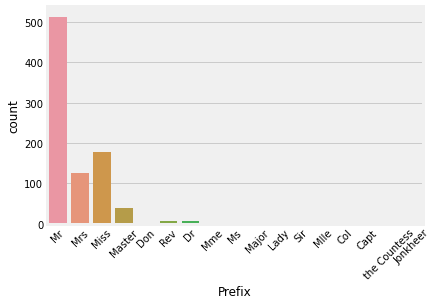

In [64]:
# Visualize the count of different prefixes in the train dataset
g = sns.countplot('Prefix', data=train)

# Rotate the x-axis labels for better visibility
g.set_xticklabels(g.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

In [65]:
pd.crosstab(train['Prefix'], train['Sex'], margins=True).style.background_gradient(cmap='summer_r')

Sex,0,1,All
Prefix,,,
Capt,1,0,1
Col,2,0,2
Don,1,0,1
Dr,6,1,7
Jonkheer,1,0,1
Lady,0,1,1
Major,2,0,2
Master,39,0,39
Miss,0,177,177


In [66]:
pd.crosstab(test['Prefix'], train['Sex'], margins=True).style.background_gradient(cmap='summer_r')

Sex,0,1,All
Prefix,,,
Col,1,1,2
Dona,1,0,1
Dr,1,0,1
Master,13,8,21
Miss,48,30,78
Mr,152,88,240
Mrs,42,30,72
Ms,1,0,1
Rev,0,2,2


In [67]:
prefix_li = list()

for i in train['Prefix'].unique():
    prefix_li.append(i)

for i in test['Prefix'].unique():
    if i not in prefix_li:
        prefix_li.append(i)

print(prefix_li)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']


In [68]:
# Replace certain prefixes with 'Rare' to reduce number of categories
train['Prefix'] = train['Prefix'].replace(['Capt', 'Col','Jonkheer','Dr', 'Major', 'Rev', 'Sir', 'Lady', 'the Countess'], 'Rare')
test['Prefix'] = test['Prefix'].replace(['Capt', 'Col','Jonkheer','Dr', 'Major', 'Rev', 'Sir', 'Lady', 'the Countess'], 'Rare')

# Replace certain prefixes with 'Mr'
train['Prefix'] = train['Prefix'].replace(['Don'], 'Mr')
test['Prefix'] = test['Prefix'].replace(['Don'], 'Mr')

# Replace certain prefixes with 'Mrs'
train['Prefix'] = train['Prefix'].replace(['Dona', 'Mme'], 'Mrs')
test['Prefix'] = test['Prefix'].replace(['Dona', 'Mme'], 'Mrs')

# Replace certain prefixes with 'Miss'
train['Prefix'] = train['Prefix'].replace(['Mlle','Ms'], 'Miss')
test['Prefix'] = test['Prefix'].replace(['Mlle','Ms'], 'Miss')

print(train.Prefix.unique())
print(test.Prefix.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


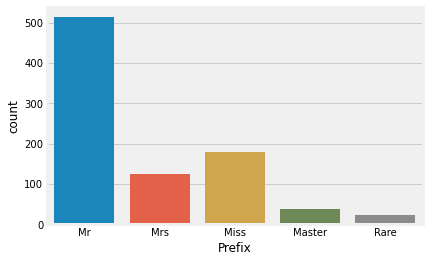

In [69]:
# Create a countplot of prefixes
sns.countplot('Prefix', data=train)

# Show the plot
plt.show()

- 카테고리별 승객의 수: Mr -> Miss -> Mrs -> Master -> Rare

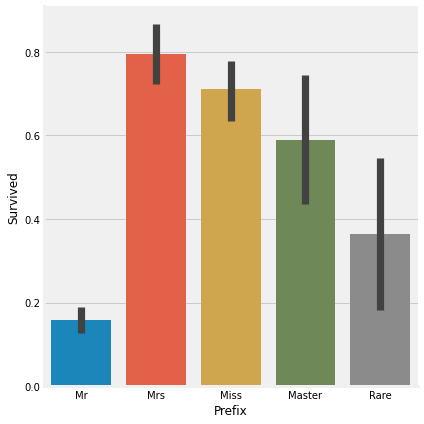

In [70]:
# Create a bar plot of the relationship between Title and Survival
sns.factorplot('Prefix', 'Survived', data=train, kind='bar', size=6)

# Show the plot
plt.show()

- 카테고리별 생존율: Mrs -> Miss -> Master -> Rare -> Mr

## 5.2 Family size
<br>

- 함께 탑승한 가족의 수가 클수록 긴급상황 시 많은 인원을 구조하려다 골든타임을 놓칠 확률이 높은 것을 감안하여 Family size를 나타내는 자료를 새롭게 구성할 필요가 있다.
- 따라서 SibSp와 Parch 그리고 자기 자신 1명을 더하여 Fize라는 Feature 새롭게 구성할 것이다.

In [71]:
# Create a new column 'Fize' which is the sum of SibSp and Parch columns + 1
train['Fize'] = train['SibSp'] + train['Parch'] + 1
test['Fize'] = test['SibSp'] + test['Parch'] + 1

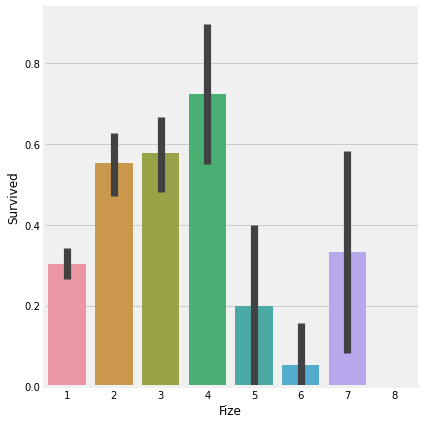

In [72]:
# Plot the survival rate bar graph on Fize
sns.factorplot('Fize', 'Survived', data=train, kind='bar', size=6)

# Show the plot
plt.show()

- 가족이 없는 승객의 경우 약 30%의 생존율을 가지며, 가족이 있는 경우 소~중규모의 가족 단위는 높은 생존율을 보이나 **대규모 가족 단위의 경우 생존율이 급격하게 감소**하는 것을 확인할 수 있다.
- 따라서, 가족단위로 한번 더 카테고리화 할 필요가 있다.

In [73]:
# Create a new column 'Alone' that takes the value 1 if Fize = 1, 0 otherwise.
train['Alone'] = train['Fize'].map(lambda i : 1 if i == 1 else 0)

# Create a new column 'SFize' that takes the value 1 if Fize = 2, 0 otherwise.
train['SFize'] = train['Fize'].map(lambda i : 1 if i == 2 else 0)

# Create a new column 'MFize' that takes the value 1 if 3 <= Fize <= 4, 0 otherwise.
train['MFize'] = train['Fize'].map(lambda i : 1 if 3<= i >= 4 else 0)

# Create a new column 'LFize' that takes the value 1 if Fize >= 5, 0 otherwise.
train['LFize'] = train['Fize'].map(lambda i : 1 if i >= 5 else 0)


In [74]:
test['Alone'] = test['Fize'].map(lambda i : 1 if i == 1 else 0)
test['SFize'] = test['Fize'].map(lambda i : 1 if i == 2 else 0)
test['MFize'] = test['Fize'].map(lambda i : 1 if 3<= i >= 4 else 0)
test['LFize'] = test['Fize'].map(lambda i : 1 if i >= 5 else 0)

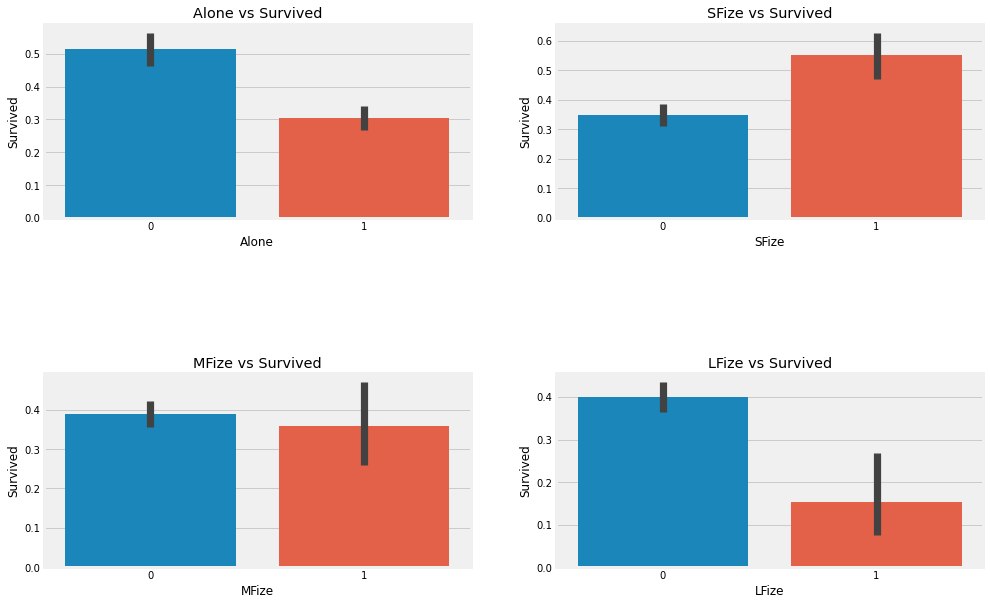

In [75]:
# Create a subplot with 2 rows and 2 columns
f, ax = plt.subplots(2,2, figsize=(15,10))

# Create a bar plot of the relationship between Alone and Survived
sns.barplot(x='Alone', y='Survived', data=train, ax=ax[0,0])
ax[0,0].set_title('Alone vs Survived')

# Create a bar plot of the relationship between SFize and Survived
sns.barplot(x='SFize', y='Survived', data=train, ax=ax[0,1])
ax[0,1].set_title('SFize vs Survived')

# Create a bar plot of the relationship between MFize and Survived
sns.barplot(x='MFize', y='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('MFize vs Survived')

# Create a bar plot of the relationship between LFize and Survived
sns.barplot(x='LFize', y='Survived', data=train, ax=ax[1,1])
ax[1,1].set_title('LFize vs Survived')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.8)

# Show the plot
plt.show()

- 가족 단위별 생존율: SFize -> MFizs -> Alone -> LFize

In [76]:
print(train.loc[train['Alone']==1]['Prefix'].value_counts())
print()
print(train.loc[train['LFize']==1]['Prefix'].value_counts())

Mr      398
Miss    103
Mrs      21
Rare     15
Name: Prefix, dtype: int64

Miss      18
Master    17
Mrs       10
Mr         7
Name: Prefix, dtype: int64


- Alone 승객의 대부분은 남성이며, LFize 승객의 성별은 다수 여성인 것으로 보았을 때 가족 단위는 생존율에 큰 영향을 미쳤을 것으로 추측할 수 있다. 

## 5.4 Ticket

In [77]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '330959', '349216', 'PC 17601', 'PC 17569',
       '335677', 'C.A. 24579', 'PC 17604', '113789', '2677', 'A./5. 2152',
       '345764', '2651', '7546', '11668', '349253', 'SC/Paris 2123',
       '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237',
       '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509', '19947',
       'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '113572',
       '36973', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464',
       '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./

- Ticket Feature는 특정한 정보를 얻기 어려운 문자와 숫자가 섞인 유형, 그리고 숫자로만 이루어진 유형으로 나눠진 것으로 확인하였다.
- 따라서, 이 패턴이 유의미하다고 가정하고 Ticket의 유형이 문자와 숫자가 섞여 있는 형태일 경우 Cabin을 예약한 승객 A와 대조하여 이를 확인해 볼 것이다.

In [78]:
# Create an empty list called 'ticket'
ticket = list()

# Iterates over every element in the 'Ticket' column
for i in list(train.Ticket):
    if not i.isdigit():
        # If the current element is not a digit, add 'O' to the 'ticket' list
        ticket.append('O')
    else:
        # if the current element is a digit, add 'X' to the 'ticket' list
        ticket.append('X')

# 'ticket' list replaces the 'Ticket' column
train['Ticket'] = ticket


train.Ticket.unique()

array(['O', 'X'], dtype=object)

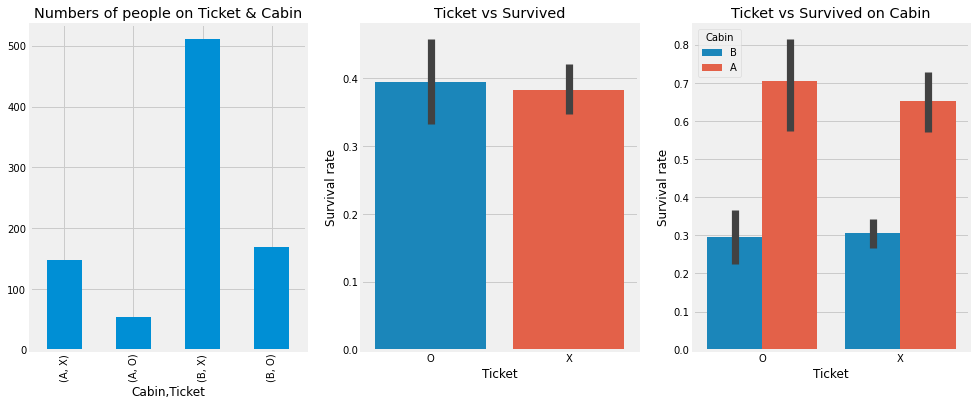

In [79]:
# Create a subplot with given arguments
f, ax = plt.subplots(1,3, figsize=(15,6))

# Draw a bar plot with Ticket and Cabin that are grouped by Cabin then counted
train[['Ticket','Cabin']].groupby('Cabin').value_counts().plot.bar(ax=ax[0])
# Set title
ax[0].set_title('Numbers of people on Ticket & Cabin')

# Draw a bar plot with survival rate of Ticket
sns.barplot('Ticket', 'Survived', data=train, ax=ax[1])
# Set title
ax[1].set_title('Ticket vs Survived')
# Set ylabel
ax[1].set_ylabel('Survival rate')

# Draw a bar plot with survival rate of Ticket on Cabin
sns.barplot('Ticket', 'Survived', hue='Cabin', data=train, ax=ax[2])
# Set title
ax[2].set_title('Ticket vs Survived on Cabin')
# Set ylabel
ax[2].set_ylabel('Survival rate')

# Show the plot
plt.show()

- Ticket의 유형으로 Cabin 유무를 예측하기에는 실제 countplot에서부터 일정한 패턴을 보이지 않으며, 생존 여부 또한 편차가 없는 것으로 나타난다.
- 결정적으로 티켓 유형과 관계없이 Cabin A의 생존율이 높은 것을 고려했을 때 **Ticket 유형을 기준으로 Cabin 유무를 예측하기에는 무리**가 있어는 것으로 판단된다.
- 유의미한 인사이트를 도출하기 어려움으로 Ticket은 drop 하여 분류 알고리즘 학습을 하는 것이 성능에 더 좋은 영향을 미칠 것으로 보인다.

## 5.5 One-Hot encoding & Normalisation
<br>

- Scikit-learn에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건
  - 컴퓨터가 이해할 수 있도록 모든 데이터는 숫자(정수형, 실수형 등)로 구성되어야 한다.
  - 데이터에 결측치가 존재하지 않아야 한다.

<br>

- 데이터를 머신러닝에 활용하기 위하여 다음과 같은 작업을 수행할 것이다.
  - Feature Engineering 수행에 따라 필요 없는 feature drop
  - Feature의 특성이 categorical value인 경우 One-Hot Encoding을 적용하여 이진형 자료로 변환
  - Feature의 특성이 quantitative value인 경우 MinMaxScaler를 적용하여 범위 0~1로 정규화

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_band,Prefix,Fize,Alone,SFize,MFize,LFize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,O,1.981001,B,S,"(-0.001, 2.066]",Mr,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,O,4.266662,A,C,"(3.418, 6.239]",Mrs,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,O,2.070022,B,S,"(2.066, 2.671]",Miss,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,X,3.972177,A,S,"(3.418, 6.239]",Mrs,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,X,2.085672,B,S,"(2.066, 2.671]",Mr,1,1,0,0,0


In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Fize,Alone,SFize,MFize,LFize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,2.057860,B,Q,Mr,1,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,1.945910,B,S,Mrs,2,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,2.270836,B,Q,Mr,1,1,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,2.159003,B,S,Mr,1,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,2.508582,B,S,Mrs,3,0,0,0,0


In [82]:
# Drop unnecessary features
train.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Fare_band', 'Fize'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fize'], axis=1, inplace=True)

In [83]:
# Apply One-Hot Encdoing to each data sets
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Cabin', 'Embarked', 'Prefix'], prefix=['Pc', 'Sex', 'Cab', 'Em', 'Pf'])
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Cabin', 'Embarked', 'Prefix'], prefix=['Pc', 'Sex', 'Cab', 'Em', 'Pf'])

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the Age and Fare columns of each dataset
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])

In [85]:
train

,Survived,Age,Fare,Alone,SFize,MFize,LFize,Pc_1,Pc_2,Pc_3,...,Cab_A,Cab_B,Em_C,Em_Q,Em_S,Pf_Master,Pf_Miss,Pf_Mr,Pf_Mrs,Pf_Rare
0,0,0.271174,0.317521,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0.472229,0.683873,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1,0.321438,0.331789,1,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,1,0.434531,0.636672,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0.434531,0.334298,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,0.334004,0.411118,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
877,1,0.233476,0.545154,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
878,0,0.164363,0.505672,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
879,1,0.321438,0.545154,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [86]:
test

,Age,Fare,Alone,SFize,MFize,LFize,Pc_1,Pc_2,Pc_3,Sex_0,...,Cab_A,Cab_B,Em_C,Em_Q,Em_S,Pf_Master,Pf_Miss,Pf_Mr,Pf_Mrs,Pf_Rare
0,0.452723,0.329840,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
1,0.617566,0.311896,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0.815377,0.363976,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
3,0.353818,0.346051,1,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4,0.287881,0.402083,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.314256,0.334298,1,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
414,0.512066,0.751796,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
415,0.505473,0.317521,1,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
416,0.314256,0.334298,1,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0


# 6. Predictive modeling

In [87]:
# import necessary libraries for classification and model selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score

In [88]:
# Drop the target variable 'Survived' from the training data
X = train.drop('Survived', axis=1)
# Assign the 'Survived' column as the target variable
y = train['Survived'] 

# Split the data into train and test set with a test size of 20%, random state of 2023 and stratifying the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y) 

## 6.1 Finding suitable models
<br>

- Machine Learning Algorithm Cheat Sheet에 따라 데이터에 적합한 알고리즘 선정할 것이다.<br><br>
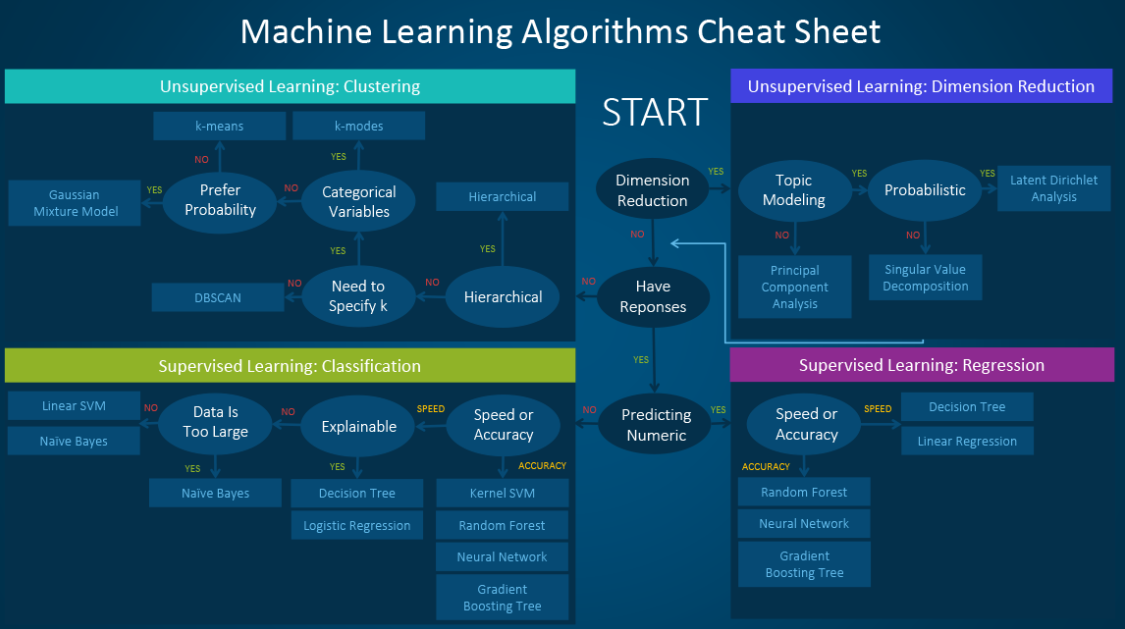

- **분류 문제**의 경우 다음과 같은 알고리즘을 적용하는 것이 일반적인 접근임을 알 수 있다.
  - SVM(linear, rbf)
  - Random Forest
  - Neural Network
  - Gradient Boosting
  - Decision Tree
  - Logistic Regression
  - Naive Bayes
<br><br>
- 위 알고리즘에 ***Cross Validation을 적용***하여 성능이 우수한 알고리즘을 선정할 것이다.

In [89]:
# Define random state variable as 2023
rs = 2023 
# Define kfold variable as 10-fold stratified cross validation
kfold = StratifiedKFold(n_splits=10) 

# list of different models to be evaluated
models = [SVC(kernel='linear', random_state=rs),
          SVC(kernel='rbf', random_state=rs),
          RandomForestClassifier(random_state=rs),
          MLPClassifier(random_state=rs),
          LogisticRegression(random_state=rs),
          GradientBoostingClassifier(random_state=rs),
          DecisionTreeClassifier(random_state=rs), 
          GaussianNB()]

# Define Variables to store average, accuracy and std
average = []
accuracy = []
std = []
# names of the models
classifiers = ['Linear SVM', 'Radial SVM', 'Random Forest', 'Neural Network', 'Logistic Regression', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes'] 

for model in models:
    # Perform cross validation and calculate accuracy
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') 
    # Append the mean, accuracy std to the list variables
    average.append(cv_result.mean()) 
    accuracy.append(cv_result)
    std.append(cv_result.std())
    
# Create a dataframe to store the results
df = pd.DataFrame({'CV_mean': average, 'CV_std': std}, index = classifiers) 

df

,CV_mean,CV_std
Linear SVM,0.828588,0.034330
Radial SVM,0.824042,0.039853
Random Forest,0.810508,0.044816
Neural Network,0.820646,0.040320
Logistic Regression,0.828588,0.037563
Gradient Boosting,0.836542,0.045248
Decision Tree,0.794637,0.053674
Naive Bayes,0.807035,0.037695


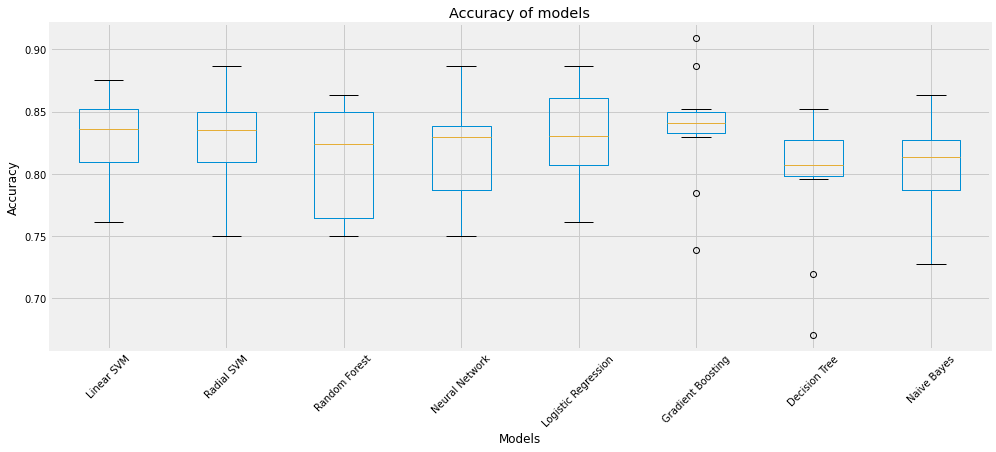

In [90]:
# Create a figure with a specific size
plt.figure(figsize=(15,6)) 
# Create a dataframe with the accuracy values
box = pd.DataFrame(accuracy, index = [i for i in classifiers]) 
# plot the boxplot
box.T.boxplot() 

# add a title to the plot
plt.title("Accuracy of models")
# add a label for the x-axis
plt.xlabel("Models") 
# add a label for the y-axis
plt.ylabel("Accuracy") 
# rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# display the plot
plt.show()

- 각 모델들의 Cross validation 평균 점수와 이를 시각화하여 결과를 확인했을 때, 다음과 같은 알고리즘들의 성능이 우수한 것으로 나타난다.
  - SVM(linear, rbf)
  - Random Forest
  - MLP
  - Logistic Regression
  - Gradient Boosting

## 6.2 Hyper-Parameter tuning
<br>

- 우수한 성능의 알고리즘에 GridSearchCV 적용을 통한 모델별 최적의 파라미터 탐색 및 하이퍼 파라미터 튜닝을 실시할 것이다.

### 6.2.1 SVC_linear

In [91]:
# Initialize the SVM classifier with the given parameters
SVC_lin = SVC(kernel='linear', probability=True, random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV with the given parameters
gsSVC_lin = GridSearchCV(SVC_lin, param_grid= param_grid, cv=kfold, n_jobs=8, scoring='accuracy', verbose=1)

# Fit the training data to the GridSearchCV
gsSVC_lin.fit(X,y)

# Extract the best estimator from the GridSearchCV
SVC_lin_best = gsSVC_lin.best_estimator_

# Print the best parameters and best score obtained from the GridSearchCV
print(gsSVC_lin.best_params_)
print(gsSVC_lin.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 0.1}
0.8285878447395302


- SVC_linear의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 82.85%이다.
  - C: 0.1


### 6.2.2 SVC_rbf

In [92]:
# Initialize the SVM classifier with the given parameters
SVC_rbf = SVC(kernel='rbf', probability=True, random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Initialize the GridSearchCV with the given parameters
gsSVC_rbf = GridSearchCV(SVC_rbf, param_grid= param_grid, cv=kfold, n_jobs=8, scoring='accuracy', verbose=1)

# Fit the training data to the GridSearchCV
gsSVC_rbf.fit(X,y)

# Extract the best estimator from the GridSearchCV
SVC_rbf_best = gsSVC_rbf.best_estimator_

# Print the best parameters and best score obtained from the GridSearchCV
print(gsSVC_rbf.best_params_)
print(gsSVC_rbf.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 1, 'gamma': 0.1}
0.8308605720122573


- SVC_rbf의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 83.08%이다.
  - C: 1
  - gamma: 0.1

### 6.2.3 Random Forest

In [93]:
# Initialize the Random Forest classifier
RFC = RandomForestClassifier(random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': [None, 'balanced']}

# Initialize the GridSearchCV with the given parameters
gsRFC = GridSearchCV(RFC, param_grid = param_grid, cv=kfold, scoring='accuracy', n_jobs=8, verbose=1)

# Fit the training data to the GridSearchCV
gsRFC.fit(X,y)

# Extract the best estimator from the GridSearchCV
RFC_best =  gsRFC.best_estimator_

# Print the best parameters and best score obtained from the GridSearchCV
print(gsRFC.best_params_)
print(gsRFC.best_score_)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits
{'class_weight': None, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
0.8354698672114402


- Random Forest의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 83.54%이다.
  - class_weight: None
  - max_depth: 10
  - max_features: auto
  - min_samples_leaf: 4
  - min_samples_split: 10
  - n_estimators: 10


### 6.2.4 Neural Network(MLP)

In [94]:
# Initialize the Multi-layer Perceptron classifier
MLP = MLPClassifier(random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'hidden_layer_sizes': [(10,), (30,), (20,20), (40,40)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.01, 0.1],
              'batch_size': [16, 32, 64],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'max_iter': [2000, 2500, 3000]}

# Initialize the RandomizedSearchCV with the given parameters
rsMLP = RandomizedSearchCV(MLP, param_distributions=param_grid, cv=kfold, scoring='accuracy', n_jobs=8, verbose=1, n_iter=100)

# Fit the training data to the RandomizedSearchCV
rsMLP.fit(X,y)

# Extract the best estimator from the RandomizedSearchCV
MLP_best = rsMLP.best_estimator_

# Print the best parameters and best score obtained from the RandomizedSearchCV
print(rsMLP.best_params_)
print(rsMLP.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'solver': 'sgd', 'max_iter': 2000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20, 20), 'batch_size': 32, 'alpha': 0.1, 'activation': 'tanh'}
0.8388278855975486


- Neural Network의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 83.88%이다.
  - solver: sgd
  - max_iter: 2000
  - learning_rate: adaptive
  - hidden_layer_sizes: (20, 20)
  - batch_size: 32
  - alpha: 0.1
  - activation: tanh

### 6.2.5 Logistic Regression

In [95]:
# Initialize the Logistic Regression model
LR = LogisticRegression(random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'max_iter': [100, 200, 500]}

# Initialize the GridSearchCV with the Logistic Regression, parameter grid and other parameters
gsLR= GridSearchCV(LR, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=8, verbose=1)
# Fit the training data to the GridSearchCV
gsLR.fit(X, y)

# Extract the best estimator from the GridSearchCV
LR_best = gsLR.best_estimator_

# Print the best parameters and best score obtained from the GridSearchCV
print(gsLR.best_params_)
print(gsLR.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.8297242083758938


- Logistic Regression의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 82.97%이다.
  - C: 1
  - max_iter: 100
  - penalty: l1
  - sovler: liblinear

### 6.2.6 Gradient Boosting

In [96]:
# Initialize the Gradient Boosting classifier
GBC = GradientBoostingClassifier(random_state=rs)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 300, 500],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.05, 0.1, 0.3],
              'subsample': [0.3, 0.5, 0.8],
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Initialize the GridSearchCV with the Gradient Boosting classifier, parameter grid and other parameters
gsGBC = GridSearchCV(GBC, param_grid = param_grid, cv=kfold, scoring='accuracy', n_jobs=8, verbose=1)

# Fit the training data to the GridSearchCV
gsGBC.fit(X,y)

# Extract the best estimator from the GridSearchCV
GBC_best = gsGBC.best_estimator_

# Print the best parameters and best score obtained from the GridSearchCV
print(gsGBC.best_params_)
print(gsGBC.best_score_)

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.3}
0.8513278855975486


- Gradient Boosting의 최적 하이퍼 파라미터는 아래와 같으며 모델의 정확도는 약 85.13%이다.
  - learning_rate: 0.05
  - max_depth: 5
  - max_features: auto
  - min_sample_leaf: 4
  - min_sample_split: 5
  - n_estimators= 50
  - subsample= 0.3

## 6.3 Learning Curve 
<br>

- 모델 학습 중 overfitting과 underfitting 여부를 확인하기 위한 learning curve 시각화 수행할 것이다.
  - Overfitting: 모델이 training data에 너무 정밀히 교정되어 정확도가 높은 것으로 보이지만, 실제 testing data에서는 정확도가 떨어지는 현상
  - Underfitting: 모델의 지나친 단순화로 인하여 정확도가 떨어지는 현상

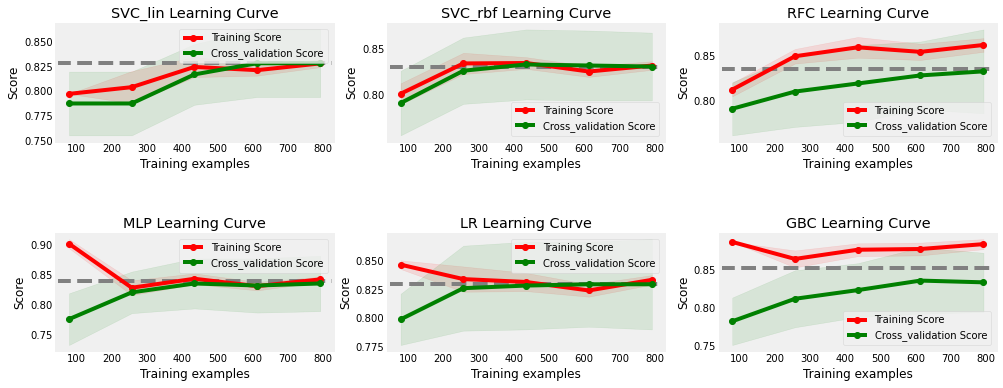

In [102]:
# function to plot the learning curve
def plot_learning_curve(estimator, bscore, title, X, Y, ylim=None, cv=None, n_jobs=8, train_sizes=np.linspace(0.1, 1.0, 5), ax=ax):
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')

    # Get the train and test scores for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # calculate the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    # fill the area between the mean train score and mean test score with a color
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

    # plot the bscore line, train scores and test scores
    ax.axhline(y=bscore, color='gray', linestyle='--')
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross_validation Score')

    ax.legend(loc='best')
    return ax

# Create a 2x3 subplot figure with the given figsize
f, ax = plt.subplots(2,3, figsize=(15,6))

# plot the learning curve for SVC_lin model
plot_learning_curve(SVC_lin_best, 0.8285, 'SVC_lin Learning Curve', X, y, cv=kfold, ax=ax[0,0])
# plot the learning curve for SVC_rbf model
plot_learning_curve(SVC_rbf_best, 0.8308, 'SVC_rbf Learning Curve', X, y, cv=kfold, ax=ax[0,1])
# plot the learning curve for RFC model
plot_learning_curve(RFC_best, 0.8354, 'RFC Learning Curve', X, y, cv=kfold, ax=ax[0,2])
# plot the learning curve for MLP model
plot_learning_curve(MLP_best, 0.8388, 'MLP Learning Curve', X, y, cv=kfold, ax=ax[1,0])
# plot the learning curve for LG model
plot_learning_curve(LR_best, 0.8297, 'LR Learning Curve', X, y, cv=kfold, ax=ax[1,1])
# plot the learning curve for GBC model
plot_learning_curve(GBC_best, 0.8513, 'GBC Learning Curve', X, y, cv=kfold, ax=ax[1,2])

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.show()

- SVC_linear: 최고 점수 수렴은 x축 기준 약 800에서 이루어지며 적절히 학습됨을 알 수 있다.
- SVC_rbf: 최고 점수 수렴은 x축 기준 약 450에서 이루어지며 적절히 학습됨을 알 수 있다.
- Radnom Forest: 최고 점수에서 수렴하지 않은 것과 x축 기준 600에서 Traning Score의 우상향 기울기 증가 그리고 Validaion Score의 우상향 기울기 감소로 보았을 때 과적합 경향이 있음을 의심해 볼 수 있으나 데이터의 양을 증가시킬 경우 수렴 가능성이 있는 것으로 보인다.
- Neural Network: 최고 점수 수렴은 x축 기준 약 600 전후에서 이루어지며 적절히 학습됨을 알 수 있다.
- Logistic Regression: 최고 점수 수렴은 x축 기준 약 520에서 이루어지며 적절히 학습됨을 알 수 있다.
- Gradient Boosting: 최고 점수에서 수렴하지 못하고 x축 기준 약 650에서 Traning Scores는 우상향 하며 Validaion Score는 우하향 하는 것으로 보았을 때 과적합 경향이 있음을 의심해 볼 수 있다.

## 6.4 Linear Correlation
<br>

- 각 알고리즘의 선형 상관계수를 구하고 이를 시각화하여 상관관계를 확인할 것이다.

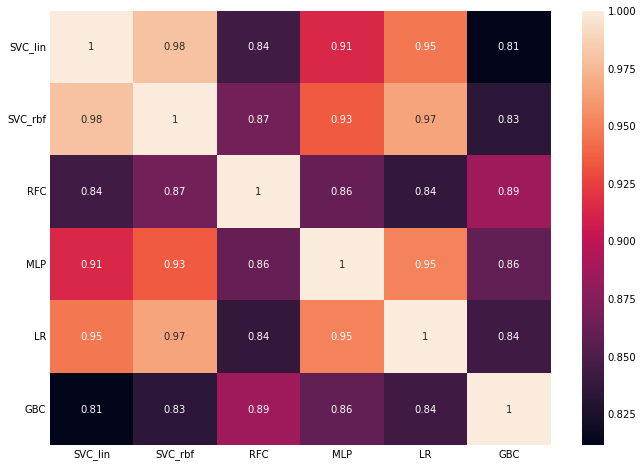

In [98]:
# Use the best estimator to make predictions on the test set
test_survived_SVC_lin = pd.Series(SVC_lin_best.predict(test), name = 'SVC_lin')
test_survived_SVC_rbf = pd.Series(SVC_rbf_best.predict(test), name = 'SVC_rbf')
test_survived_RFC = pd.Series(RFC_best.predict(test), name = 'RFC')
test_survived_MLP = pd.Series(MLP_best.predict(test), name = 'MLP')
test_survived_LR = pd.Series(LR_best.predict(test), name = 'LR')
test_survived_GBC = pd.Series(GBC_best.predict(test), name = 'GBC')

# Concatenate the predictions into one DataFrame
ensemble_results = pd.concat([test_survived_SVC_lin, test_survived_SVC_rbf, test_survived_RFC, test_survived_MLP, test_survived_LR, test_survived_GBC], axis=1)

# Plot a heatmap to show the correlation between the different predictions
sns.heatmap(ensemble_results.corr(), annot=True)

# Adjust size of the palette
fig=plt.gcf()
fig.set_size_inches(10,8)

# Show the plot
plt.show()

- RFC와 GBC의 선형 상관계수는 타 알고리즘에 비하여 11\~17% 범위로 낮지만, 모든 알고리즘의 계수가 81\~98%의 범위로 서로 깊은 관계가 있다.

# 7. Prediction
<br>

- GridseachCV와 RandomizedCV로 Hyperparameter tuning이 완료된 알고리즘으로 앙상블 알고리즘(VotingClassifier)을 모델링 하여 성능 확인 및 최종 예측 실시.

## 7.1 Ensemble modeling

In [99]:
# Initialize the voting classifier with the best estimators of the different models
votingC = VotingClassifier(estimators=[('SVC_lin', SVC_lin_best), ('SVC_rbf', SVC_rbf_best), ('RFC', RFC_best), ('MLP', MLP_best), ('LR', LR_best), ('GBC', GBC_best)],
                           voting='soft',
                           n_jobs=8)

# Fit the voting classifier on the training data
votingC.fit(X_train,y_train)

# Make predictions on the test set
prediction = votingC.predict(X_test)

# Print the accuracy of the ensemble model
print(f'Accuracy score: {accuracy_score(prediction, y_test).round(2)*100}')

Accuracy score: 79.0


- Voting Classifier를 통한 앙상블 알고리즘 모델링 X_test의 정확도 측정 결과는 약 79%이다.
- 추후 Hyper parameter, Kfold 등의 이해도를 확장하여 조정한다면 예측도를 더 향상시킬 수 있을 것으로 예상된다.

## 7.2 Final prediction

In [100]:
# Fit the voting classifier on the entire dataset
votingC.fit(X,y)

# Make predictions on the test set
prediction = votingC.predict(test)

# Read the submission template
submission = pd.read_csv('gender_submission.csv')

# Add the predictions to the submission template
submission['Survived'] = prediction

# Save the submission file
submission.to_csv('result.csv', index=False)


In [101]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 8. General Review

근대 사회의 가장 유명한 비극으로 불리는 타이타닉 침몰사건의 데이터를 분석해 보았을 때, 침몰 중 전원의 생사가 갈리는 급박한 상황에서도 **성별, 나이, 탑승 등급 등 특정한 성격이 생존율에 막대한 영향을 끼치는 것을 확인**할 수 있었다. 

특히, 자본주의 사회의 당연한 이치라고 볼 수 있음에도 **Pclass 1과 크게 대조되는 Pclass 3의 생존율**은 서구권 근대 사회에서 부유층과 빈곤층의 대우가 어떻게 달랐을지 그려볼 수 있는 계기가 되었다.

본인의 사회적 지위 등을 내려놓은 체 ***Women and Children first***를 외치며 가족, 친구 또는 동료로써 용감하게 희생한 모든 영웅에게 큰 박수를 보내며, 성별과 지위 그리고 나이와 관계없이 모두가 평등, 동등하며 자유롭기를 꿈꾸고 진통하고 있는 대한민국 현대 사회의 밝은 미래를 기원한다.

<br>

---

- Practiced by, 오진규
- Completion date, 2023. 1. 27.

---